In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/Churn_Modelling.csv',index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Cleaning and Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
len(data['CustomerId'].unique())

10000

In [6]:
data = data.drop(['CustomerId','Surname'],axis = 1)

### Data Visualization

- Are there any patterns in Churn Customers based on CreditScore, Gender, Age, Tenure, HasCreditCard, numofproducts, Balance, etc. 


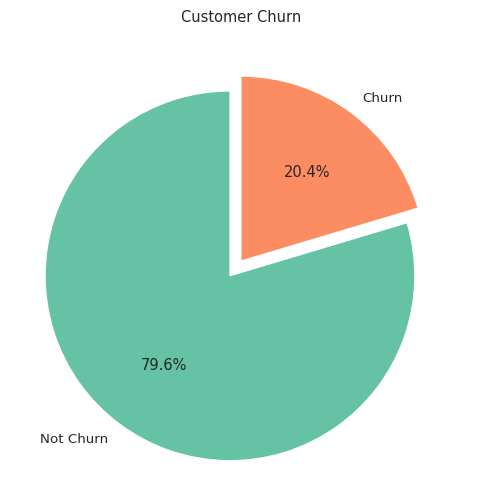

In [60]:
#Total churn count in the dataset
churn_count = data['Exited'].value_counts()
churn_count.index = ['Not Churn', 'Churn']

plt.figure(figsize=(6,6))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%',explode=(0.1,0),startangle=90,colors=sns.color_palette("Set2"))
plt.title('Customer Churn')
plt.show()

- 20.4% of customers churn in the dataset

**Churn Distribution based on Credit Score**

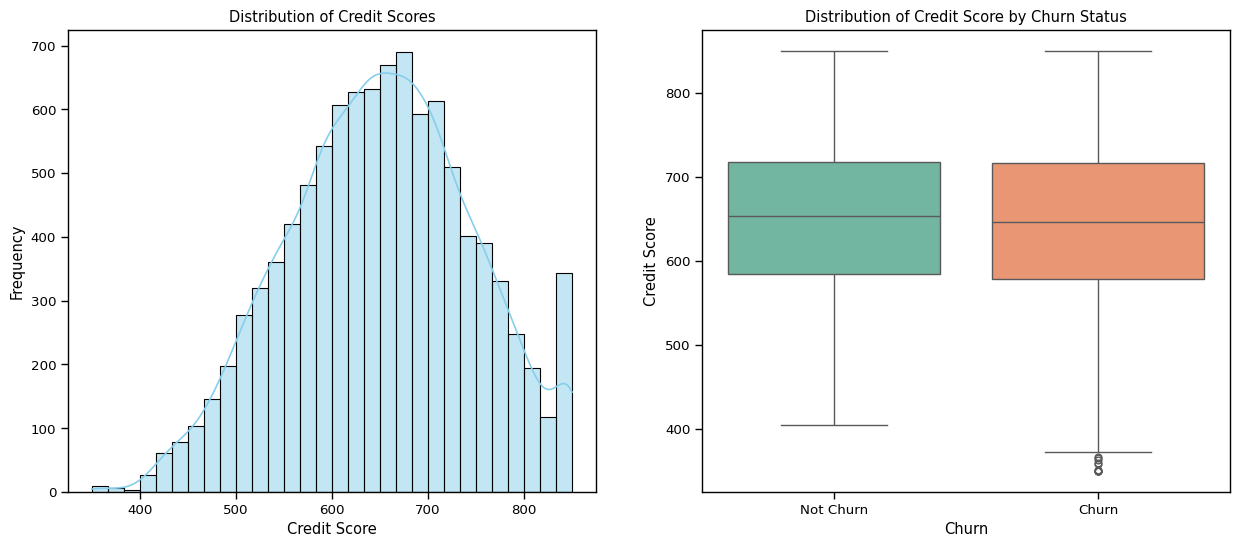

In [70]:
sns.set_context("paper",font_scale=1.1)
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.histplot(data['CreditScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x='Exited', y='CreditScore', data=data,palette=sns.color_palette('Set2',2),hue='Exited',legend=False)
plt.title('Distribution of Credit Score by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Not Churn', 'Churn'])

plt.show()

In [40]:
len(data[data['CreditScore']<400])

19

-  Most of the customers' credit scores fall within the range of 500-800.
-  Analyzing the boxplot, customers with exceptionally  low credit scores (below 400),a very small portion of the total customers(19 individuals), are more likely to exit the bank.  
-  Beyond this, there isn't enough evidence to suggest that the credit score significantly influences the likelihood of customer churn. 

**Churn Distribution by Geography**

In [95]:
grouped_data = data.groupby(['Geography', 'Exited']).size().unstack()
total_customers = grouped_data.sum(axis=1)
grouped_data

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


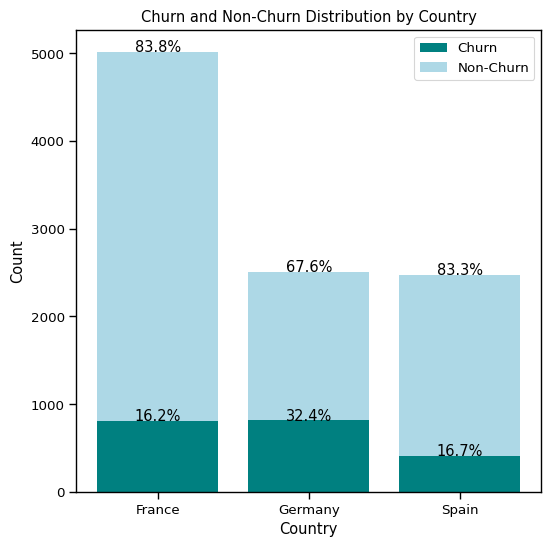

In [103]:
percentage_churn = (grouped_data[1] / total_customers) * 100
percentage_not_churn = (grouped_data[0] / total_customers) * 100

plt.figure(figsize=(6, 6))
p1 = plt.bar(grouped_data.index, grouped_data[1],color="teal")
p2 = plt.bar(grouped_data.index, grouped_data[0], bottom=grouped_data[1],color="lightblue")

plt.title('Churn and Non-Churn Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend((p1, p2[0]), ('Churn', 'Non-Churn'))

for i in range(len(grouped_data.index)):
    plt.text(i, grouped_data[1][i] + grouped_data[0][i], f'{percentage_not_churn[i]:.1f}%', ha='center', va='baseline')
    plt.text(i, grouped_data[1][i], f'{percentage_churn[i]:.1f}%', ha='center', va='baseline')

plt.show()

- Germany has two times the churn rate of other countries. 

**Churn distribution by Gender**

In [66]:
data["Exited"][data["Exited"]==0].groupby(by=data["Gender"]).count()

Gender
Female    3404
Male      4559
Name: Exited, dtype: int64

In [67]:
data["Exited"][data["Exited"]==1].groupby(by=data["Gender"]).count()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

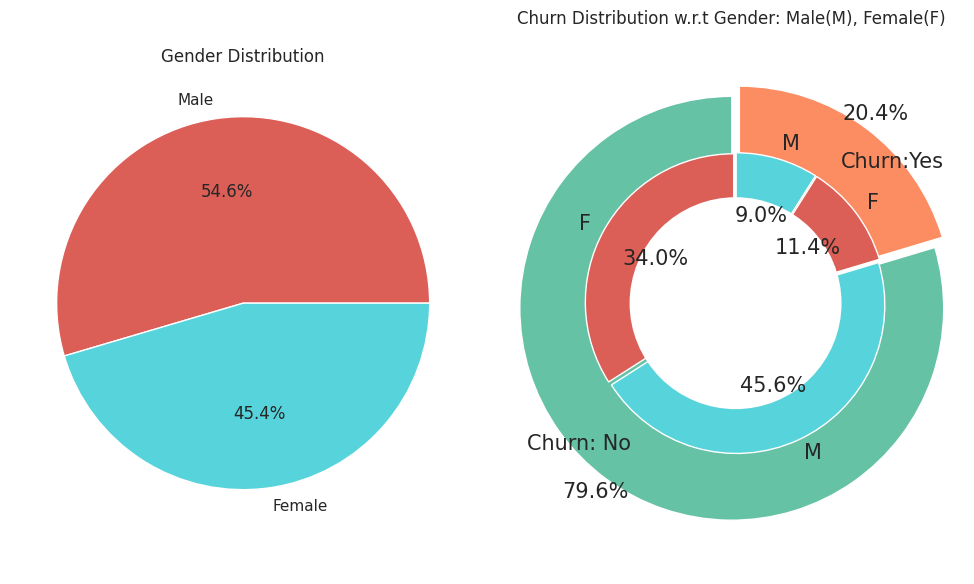

In [96]:
plt.figure(figsize=(10, 6))
labels =["Churn: No","Churn:Yes"]
values = data['Exited'].value_counts()
labels_gender = ["F","M","F","M"]
sizes_gender = [3404,4559 , 1139,898]
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

gender_count = data['Gender'].value_counts()


plt.subplot(1, 2, 1)
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=sns.color_palette("hls", 2))
plt.title('Gender Distribution')

plt.subplot(1,2,2)
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=sns.color_palette("Set2"), startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,autopct='%1.1f%%',colors=sns.color_palette("hls",2),startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)')


plt.axis('equal')
plt.tight_layout()
plt.show()

-  There are more males than females in the dataset. 
-  The churn rate is slightly higher in females than in males.  

**Churn Distribution by Age**

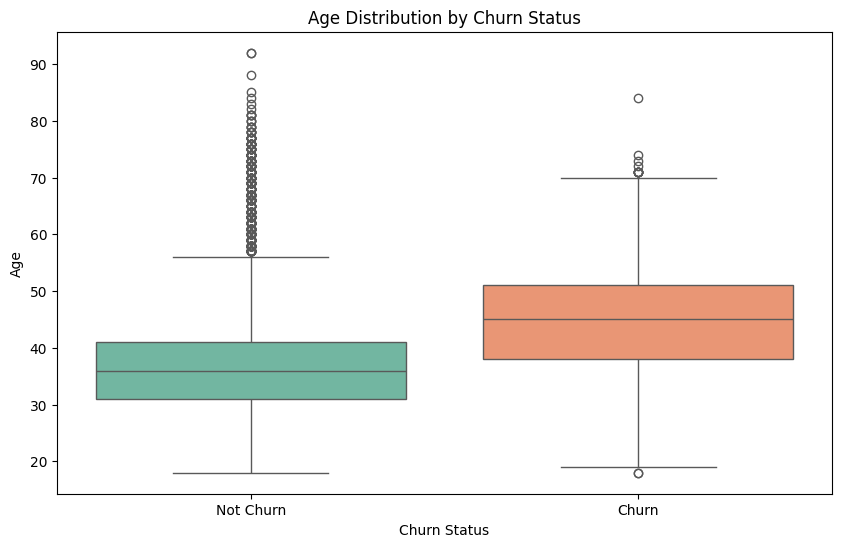

In [21]:
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x='Exited', y='Age', data=data, palette='Set2')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()


-  The median age of customers who churned is greater than those that did not churn
-  The age range for customers who did not churn is approximately 20-60, and most customers fall between 30 to 42 years of age. There are a significant no. of outliers in the older ages.
-  The age range for those who churned is 20-70 and most customers who churned fall between 35 to 50 years of age. There's only a few outliers in the older range. 
- Therefore, Customers who churned tend to be older on average compared to those who did not churn. This suggests that age might be a factor in customer churn, with older customers being more likely to leave the service.

**Churn distribution by Tenure**

In [48]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [165]:
grouped_data = data.groupby(['Tenure', 'Exited']).size().unstack()
total_customers = grouped_data.sum(axis=1)

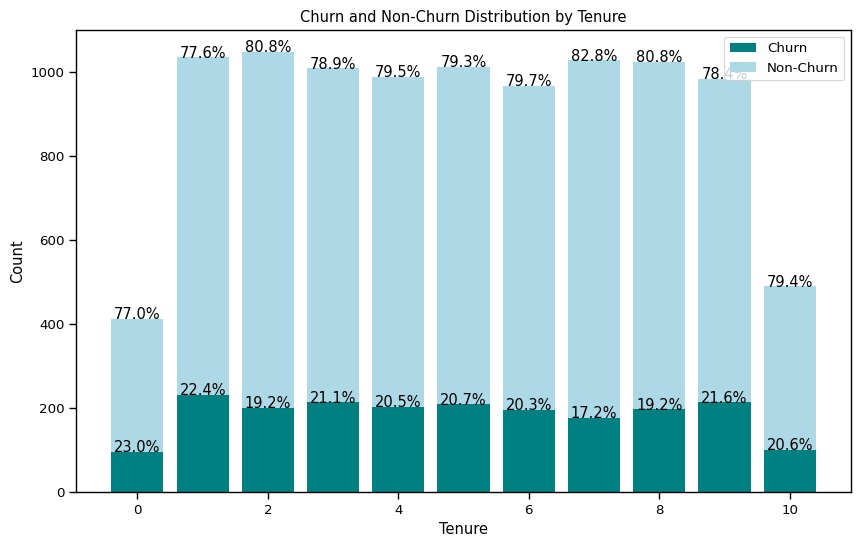

In [166]:
percentage_churn = (grouped_data[1] / total_customers) * 100
percentage_not_churn = (grouped_data[0] / total_customers) * 100

plt.figure(figsize=(10, 6))
p1 = plt.bar(grouped_data.index, grouped_data[1],color="teal")
p2 = plt.bar(grouped_data.index, grouped_data[0], bottom=grouped_data[1],color="lightblue")

plt.title('Churn and Non-Churn Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend((p1, p2[0]), ('Churn', 'Non-Churn'))

for i in range(len(grouped_data.index)):
    plt.text(i, grouped_data[1][i] + grouped_data[0][i], f'{percentage_not_churn[i]:.1f}%', ha='center', va='baseline')
    plt.text(i, grouped_data[1][i], f'{percentage_churn[i]:.1f}%', ha='center', va='baseline')

plt.show()

-  Lowest churn rate is 17.2%(tenure 7), and highest is 23.0%(tenure 0). The churn rates are fairly consistent across different groups. 
-  Tenure 0 and 1 has the highest churn rate, however their rate doesn't vary significantly from other groups. 
-  These indicate that Tenure does not strongly influence customer churn behaviour. 

**Churn distribution by Account Balance**

In [73]:
data['Balance'].max()

250898.09

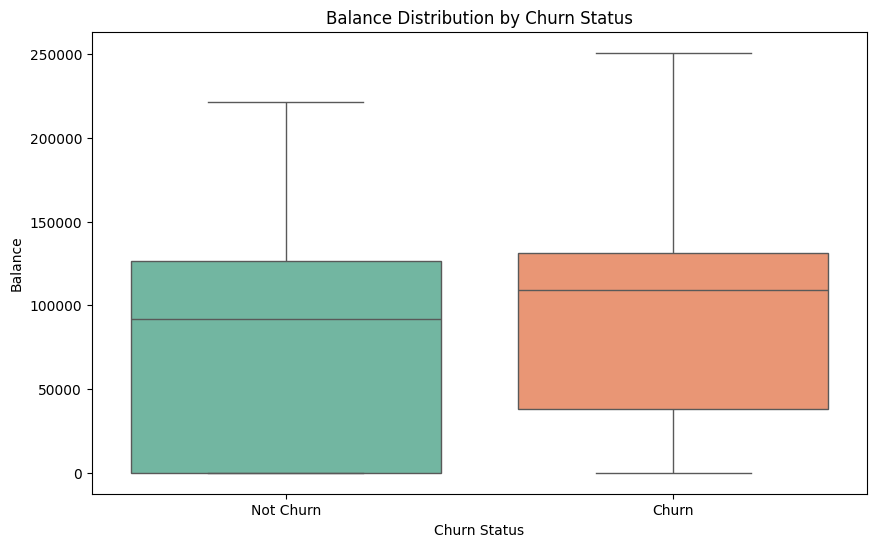

In [22]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Exited', y='Balance', data=data, palette='Set2')
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()


-  The range of customers who do not churn is from 0 to 225000 approximately.
-  Whereas for those who churned the range is 0-250000, and most customers fall between 50000-125000 approximately. 
-  The median is slightly higher for churned customers. 
-  On average, customers with higher balance are more likely to churn. 

**Churn Distibution by Number of Products Owned by Customers**

In [163]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Text(0.5, 1.0, 'Churn Distribution by No. Of Products')

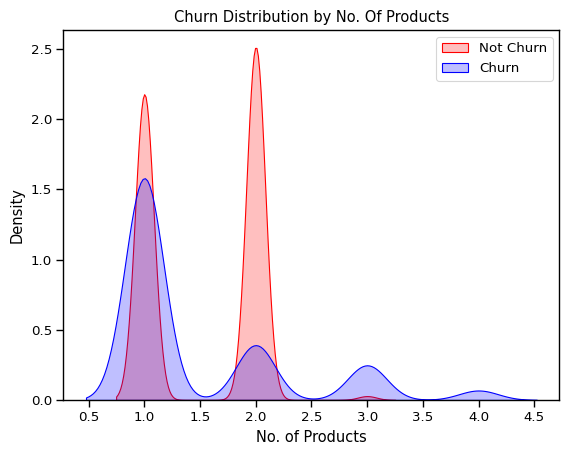

In [40]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.NumOfProducts[(data["Exited"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(data.NumOfProducts[(data["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No. of Products')
ax.set_title('Churn Distribution by No. Of Products')

-  High churn is seen in customers with only 1 product. However, the majority of customers in this group do not churn. 
-  Customers with 2 products have a very low likelihood of churn. This group is most stable and also has the most no. of customers. 
-  There are fewer customers with more that 2 products, but these customers show the highest propensity to churn. 

**Churn Distribution for Customers with and without Credit Cards**

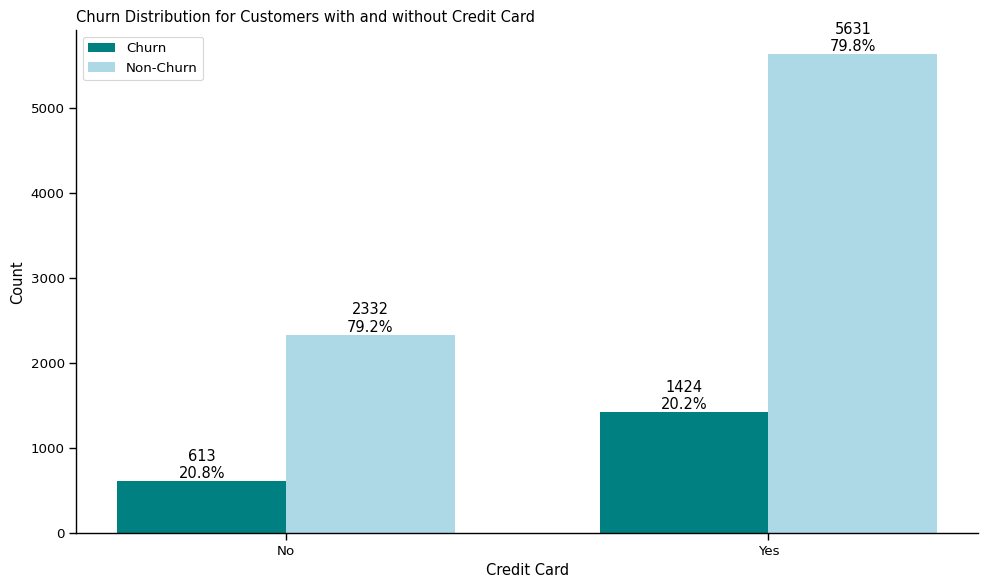

In [39]:
churn_counts = data.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

total_customers = churn_counts.sum(axis=1)

percentage_churn = (churn_counts[1] / total_customers) * 100
percentage_not_churn = (churn_counts[0] / total_customers) * 100

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = churn_counts.index

bar1 = plt.bar(index, churn_counts[1], bar_width, label='Churn', color='teal')
bar2 = plt.bar(index + bar_width, churn_counts[0], bar_width, label='Non-Churn', color='lightblue')

plt.title('Churn Distribution for Customers with and without Credit Card',loc='left')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, ['No','Yes'])
plt.legend()
#remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar, perc_churn, perc_not_churn in zip(bar1, percentage_churn, percentage_not_churn):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n{perc_churn:.1f}%', ha='center', va='bottom', color='black')

for bar, perc_churn, perc_not_churn in zip(bar2, percentage_churn, percentage_not_churn):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n{perc_not_churn:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


-  In the dataset, most customers own a credit card.
-  The churn rate is similar for customers with and without a credit card. 
-  This suggests that owning a credit card doesn't influence the churn behavior. 

**Churn Distribution by Customer Activity Status**

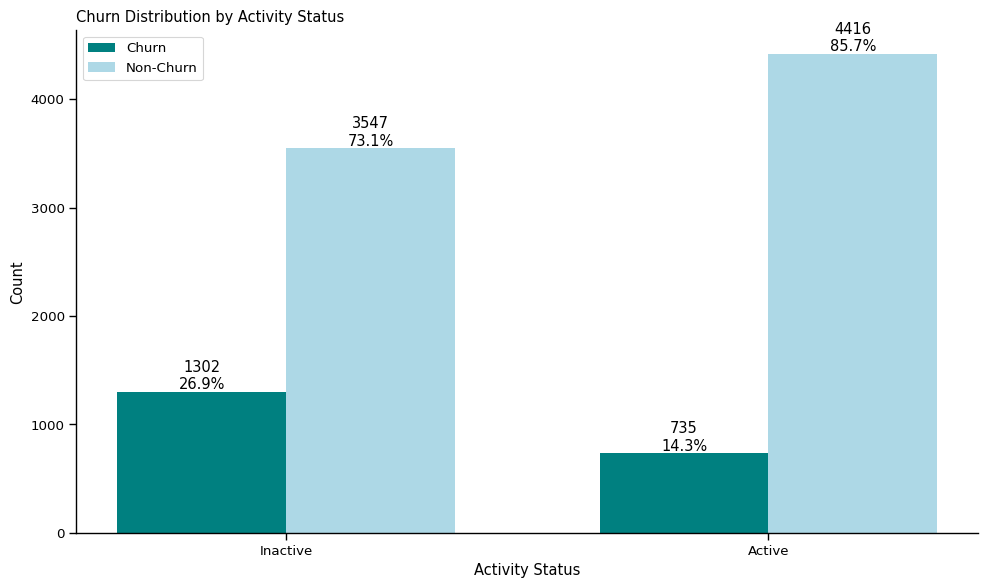

In [42]:
churn_counts = data.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

total_customers = churn_counts.sum(axis=1)

percentage_churn = (churn_counts[1] / total_customers) * 100
percentage_not_churn = (churn_counts[0] / total_customers) * 100

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = churn_counts.index

bar1 = plt.bar(index, churn_counts[1], bar_width, label='Churn', color='teal')
bar2 = plt.bar(index + bar_width, churn_counts[0], bar_width, label='Non-Churn', color='lightblue')

plt.title('Churn Distribution by Activity Status',loc='left')
plt.xlabel('Activity Status')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, ['Inactive','Active'])
plt.legend()
#remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar, perc_churn, perc_not_churn in zip(bar1, percentage_churn, percentage_not_churn):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n{perc_churn:.1f}%', ha='center', va='bottom', color='black')

for bar, perc_churn, perc_not_churn in zip(bar2, percentage_churn, percentage_not_churn):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n{perc_not_churn:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


-  14.3% of Active customers churned.
-  26.9% of Inactive customers churned, almost twice the churn rate of active customers. 
-  Inactive customers are nearly twice as likely to churn compared to active customers. 

**Churn Distribution by Estimated Salary**

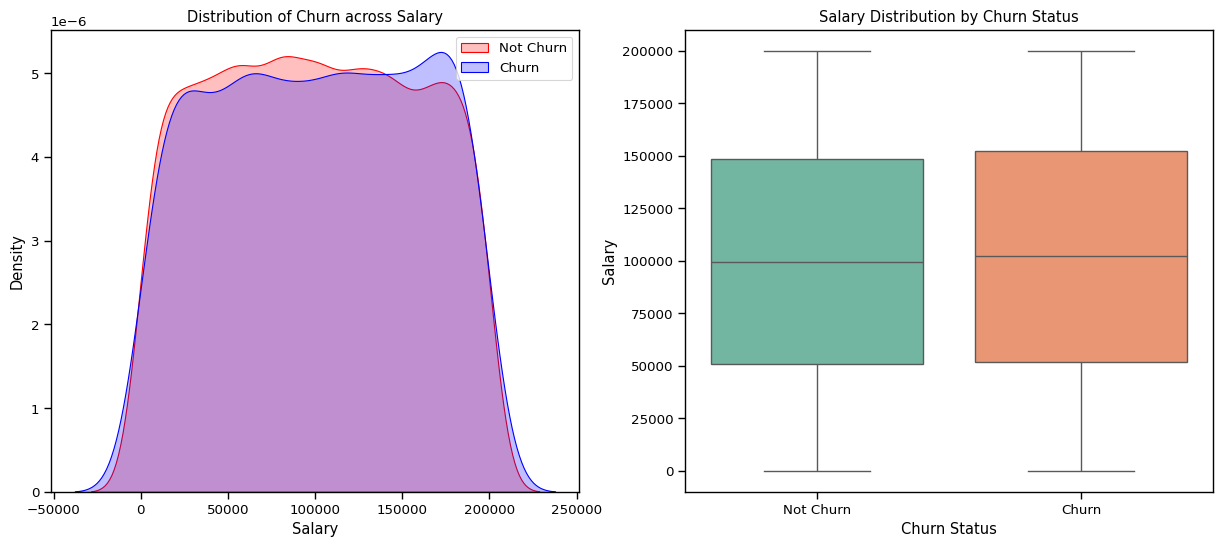

In [38]:
sns.set_context("paper",font_scale=1.1)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Salary')
ax.set_title('Distribution of Churn across Salary')

plt.subplot(1,2,2)
sns.boxplot(x='Exited', y='EstimatedSalary', data=data, palette='Set2')
plt.title('Salary Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Salary')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.show()


-  Churn rates appear consistent across different salary levels. 
-  There are only negligible differences in the distribution of churned and non-churned customers across various salary levels.  

In [7]:
# data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# data.to_csv('data/Churn_cleaned.csv')